In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Persiapan Data

In [4]:
data['Age'] = data['YearRemodAdd'] - data['YearBuilt']

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,55
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


## Membuat variabel umur bangunan saat terjual

In [6]:
data['SaleAge'] = (data['YrSold'] - data['YearBuilt']) + (data['MoSold']/12)

In [7]:
data.drop(columns = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold'], axis = 1, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
data.drop('GarageYrBlt', axis = 1, inplace = True)

In [10]:
data = data.astype({'OverallQual' : 'object', 'OverallCond' : 'object'})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

## Penanganan Nilai Hilang

<AxesSubplot:>

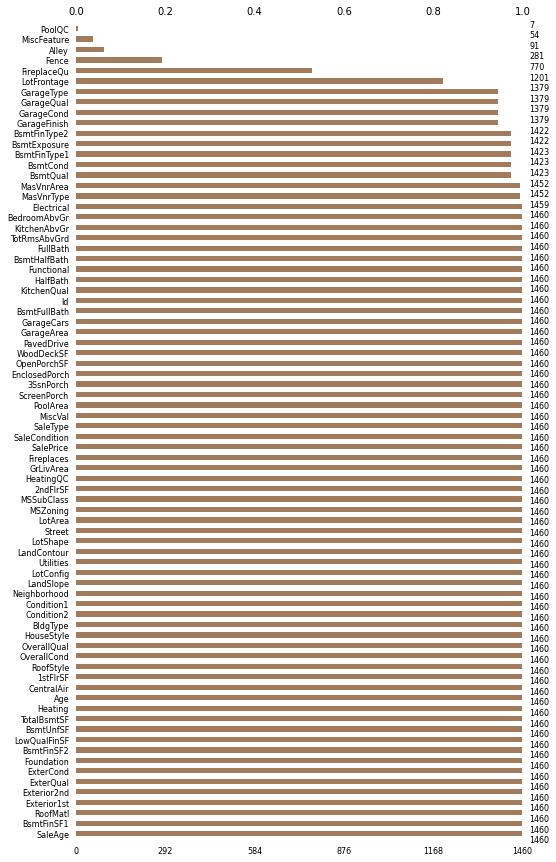

In [12]:
import missingno as msnum
fig = msnum.bar(data, color = '#A27B5C', sort = 'descending', figsize = (8,15), fontsize = 8 )
fig_copy = fig.get_figure()
fig_copy.savefig('plot missing value1.png', bbox_inches = 'tight')
fig

#### menghapus variabel dengan missing value lebih dari 40% 

In [13]:
percent_miss = data.isnull().sum()*100/len(data)
percent_miss.sort_values(ascending = False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
Heating         0.000000
HeatingQC       0.000000
MSSubClass      0.000000
1stFlrSF        0.000000
SaleAge         0.000000
Length: 78, dtype: float64

In [14]:
miss = percent_miss[percent_miss  < 40].sort_values(ascending = False).index.tolist()
data = data.loc[:, miss]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   GarageType     1379 non-null   object 
 2   GarageFinish   1379 non-null   object 
 3   GarageQual     1379 non-null   object 
 4   GarageCond     1379 non-null   object 
 5   BsmtExposure   1422 non-null   object 
 6   BsmtFinType2   1422 non-null   object 
 7   BsmtQual       1423 non-null   object 
 8   BsmtCond       1423 non-null   object 
 9   BsmtFinType1   1423 non-null   object 
 10  MasVnrArea     1452 non-null   float64
 11  MasVnrType     1452 non-null   object 
 12  Electrical     1459 non-null   object 
 13  BedroomAbvGr   1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  GrLivAre

In [15]:
percent_miss[percent_miss  > 40]

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   GarageType     1379 non-null   object 
 2   GarageFinish   1379 non-null   object 
 3   GarageQual     1379 non-null   object 
 4   GarageCond     1379 non-null   object 
 5   BsmtExposure   1422 non-null   object 
 6   BsmtFinType2   1422 non-null   object 
 7   BsmtQual       1423 non-null   object 
 8   BsmtCond       1423 non-null   object 
 9   BsmtFinType1   1423 non-null   object 
 10  MasVnrArea     1452 non-null   float64
 11  MasVnrType     1452 non-null   object 
 12  Electrical     1459 non-null   object 
 13  BedroomAbvGr   1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  GrLivAre

In [17]:
data.isna().sum()

LotFrontage     259
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
HeatingQC         0
SaleAge           0
Length: 73, dtype: int64

# Feature Selection

In [18]:
data1 = data.copy()
data1.dropna(axis = 0, inplace = True)

In [19]:
data_num = data1.select_dtypes(exclude = ['object'])
data_num.head()

,LotFrontage,MasVnrArea,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,TotRmsAbvGrd,KitchenAbvGr,...,GarageCars,LowQualFinSF,1stFlrSF,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,MSSubClass,SaleAge
0,65.0,196.0,3,1,2,0,1,1710,8,1,...,2,0,856,8450,706,0,150,856,60,5.166667
1,80.0,0.0,3,0,2,1,0,1262,6,1,...,2,0,1262,9600,978,0,284,1262,20,31.416667
2,68.0,162.0,3,1,2,0,1,1786,6,1,...,2,0,920,11250,486,0,434,920,60,7.750000
3,60.0,0.0,3,0,1,0,1,1717,7,1,...,3,0,961,9550,216,0,540,756,70,91.166667
4,84.0,350.0,4,1,2,0,1,2198,9,1,...,3,0,1145,14260,655,0,490,1145,60,9.000000


In [20]:
data_num.drop('SalePrice', axis = 1, inplace = True)

pemilihan variabel numerik didasarkan dengan nilai korelasi

In [21]:
from sklearn.feature_selection import SelectKBest,r_regression
y = data1['SalePrice']
select = SelectKBest(r_regression, k = 'all')
select.fit(data_num, y)

SelectKBest(k='all', score_func=<function r_regression at 0x0000023AF146A310>)

In [22]:
cols = select.get_support(indices=True)
cols

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [23]:
data_num = data_num.iloc[:,cols]
data_num

,LotFrontage,MasVnrArea,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,TotRmsAbvGrd,KitchenAbvGr,...,GarageCars,LowQualFinSF,1stFlrSF,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,MSSubClass,SaleAge
0,65.0,196.0,3,1,2,0,1,1710,8,1,...,2,0,856,8450,706,0,150,856,60,5.166667
1,80.0,0.0,3,0,2,1,0,1262,6,1,...,2,0,1262,9600,978,0,284,1262,20,31.416667
2,68.0,162.0,3,1,2,0,1,1786,6,1,...,2,0,920,11250,486,0,434,920,60,7.750000
3,60.0,0.0,3,0,1,0,1,1717,7,1,...,3,0,961,9550,216,0,540,756,70,91.166667
4,84.0,350.0,4,1,2,0,1,2198,9,1,...,3,0,1145,14260,655,0,490,1145,60,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,3,1,2,0,0,1647,7,1,...,2,0,953,7917,0,0,953,953,60,8.666667
1456,85.0,119.0,3,0,2,0,1,2073,7,1,...,2,0,2073,13175,790,163,589,1542,20,32.166667
1457,66.0,0.0,4,0,2,0,0,2340,9,1,...,1,0,1188,9042,275,0,877,1152,70,69.416667
1458,68.0,0.0,2,0,1,0,1,1078,5,1,...,1,0,1078,9717,49,1029,0,1078,20,60.333333


## Numerik terpilih

In [24]:
num = data[['GrLivArea', 'GarageArea', 'GarageCars', '1stFlrSF', 'TotalBsmtSF']]

In [25]:
num.isna().sum()

GrLivArea      0
GarageArea     0
GarageCars     0
1stFlrSF       0
TotalBsmtSF    0
dtype: int64

## Kategorik

In [26]:
data_cat = data1.select_dtypes('object')

In [27]:
data_cat.head()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1,MasVnrType,...,OverallCond,CentralAir,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,HeatingQC
0,Attchd,RFn,TA,TA,No,Unf,Gd,TA,GLQ,BrkFace,...,5,Y,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Ex
1,Attchd,RFn,TA,TA,Gd,Unf,Gd,TA,ALQ,None,...,8,Y,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Ex
2,Attchd,RFn,TA,TA,Mn,Unf,Gd,TA,GLQ,BrkFace,...,5,Y,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Ex
3,Detchd,Unf,TA,TA,No,Unf,TA,Gd,ALQ,None,...,5,Y,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,Gd
4,Attchd,RFn,TA,TA,Av,Unf,Gd,TA,GLQ,BrkFace,...,5,Y,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Ex


Pemililhan variabel kategorik didasarkan dengan f test atau ANOVA. Hal ini dilakkukan menyesuaikan dengan skala data

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# create a dataframe to store label encoded values
data_cat_le = data_cat.copy()

for i in data_cat.columns:
    le.fit(data_cat[i])
    data_cat_le[i] = le.transform(data_cat[i]).copy()

In [29]:
data_cat_le.head()

,GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1,MasVnrType,...,OverallCond,CentralAir,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,HeatingQC
0,1,1,4,4,3,5,2,3,2,1,...,3,1,1,1,11,13,2,3,2,0
1,1,1,4,4,1,5,2,3,0,2,...,6,1,1,1,7,8,3,3,1,0
2,1,1,4,4,2,5,2,3,2,1,...,3,1,1,1,11,13,2,3,2,0
3,5,2,4,4,3,5,3,1,0,2,...,3,1,1,1,12,15,3,3,0,2
4,1,1,4,4,0,5,2,3,2,1,...,3,1,1,1,11,13,2,3,2,0


In [30]:
from sklearn.feature_selection import f_classif
y = data1['SalePrice']
select = SelectKBest(f_classif, k = 4)
select.fit(data_cat_le, y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=4)

In [31]:
p_values = pd.Series(select.pvalues_,index = data_cat.columns)
p_values.sort_values(ascending = True)

ExterQual        0.000000e+00
OverallQual      0.000000e+00
Street           2.242078e-41
BsmtQual         2.796741e-35
KitchenQual      2.172381e-30
MSZoning         7.168977e-17
GarageFinish     1.019254e-16
RoofMatl         6.710260e-10
Foundation       9.413758e-09
BsmtExposure     4.014202e-06
LotShape         1.741874e-05
Neighborhood     4.346756e-05
CentralAir       7.768760e-05
MasVnrType       1.336298e-04
GarageType       1.057173e-03
HeatingQC        2.506476e-03
LandSlope        4.876883e-02
BldgType         6.509396e-02
Electrical       6.696466e-02
OverallCond      1.130338e-01
RoofStyle        1.726396e-01
Exterior2nd      1.860046e-01
SaleCondition    2.309204e-01
Condition2       2.455866e-01
Exterior1st      2.896894e-01
BsmtCond         4.914771e-01
GarageQual       5.125828e-01
LandContour      5.255404e-01
LotConfig        6.997148e-01
HouseStyle       7.772073e-01
BsmtFinType1     8.507510e-01
ExterCond        8.747420e-01
PavedDrive       9.272638e-01
SaleType  

In [32]:
cols = select.get_support(indices=True)
cols

array([ 6, 17, 19, 36], dtype=int64)

In [33]:
data_cat1 = data_cat.iloc[:,cols]

In [34]:
data_cat1

,BsmtQual,OverallQual,Street,ExterQual
0,Gd,7,Pave,Gd
1,Gd,6,Pave,TA
2,Gd,7,Pave,Gd
3,TA,7,Pave,TA
4,Gd,8,Pave,Gd
...,...,...,...,...
1455,Gd,6,Pave,TA
1456,Gd,6,Pave,TA
1457,TA,7,Pave,Ex
1458,TA,5,Pave,TA


In [35]:
cat = data[['BsmtQual', 'OverallQual', 'Street', 'ExterQual']]

In [36]:
cat.isna().sum()

BsmtQual       37
OverallQual     0
Street          0
ExterQual       0
dtype: int64

In [37]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

# Variabel X terpilih

In [38]:
prediktor = pd.concat((num,cat), axis = 1)

In [39]:
prediktor.isna().sum()

GrLivArea       0
GarageArea      0
GarageCars      0
1stFlrSF        0
TotalBsmtSF     0
BsmtQual       37
OverallQual     0
Street          0
ExterQual       0
dtype: int64

In [40]:
prediktor['OverallQual'].replace({1: 'Po',2 : 'Po', 3 : 'Fa', 4 : 'Fa', 5 :'TA',6 : 'TA',
                                 7 : 'Gd' , 8 : 'Gd', 9 : 'Ex', 10 : 'Ex'}, inplace = True)

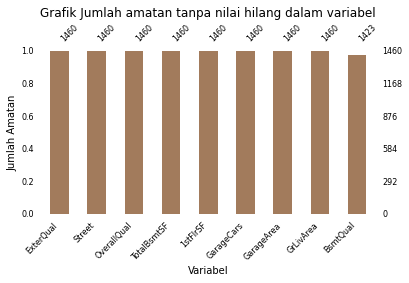

In [41]:
import missingno as msnum
plt.title('Grafik Jumlah amatan tanpa nilai hilang dalam variabel')
plt.ylabel('Jumlah Amatan')
plt.xlabel('Variabel')
msnum.bar(prediktor, color = '#A27B5C', sort = 'descending', figsize = (6,3), fontsize = 8 )
plt.savefig('plot missing value1.png', bbox_inches = 'tight')

## Mengisi dengan modus

In [42]:
data['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [43]:
prediktor1 = prediktor.copy()
prediktor1['BsmtQual'] = prediktor['BsmtQual'].fillna(prediktor['BsmtQual'].mode()[0])

In [44]:
prediktor1['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

## Mengisi dengan identifikasi nilai

In [45]:
data[data['BsmtQual'].isna()]

,LotFrontage,GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1,...,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,MSSubClass,HeatingQC,SaleAge
17,72.0,CarPort,Unf,TA,TA,NaN,NaN,NaN,NaN,NaN,...,TA,TA,Slab,0,0,0,0,90,TA,39.833333
39,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TA,TA,PConc,0,0,0,0,90,TA,53.500000
90,60.0,Detchd,Unf,TA,TA,NaN,NaN,NaN,NaN,NaN,...,TA,TA,Slab,0,0,0,0,20,TA,56.583333
102,64.0,Attchd,Unf,TA,TA,NaN,NaN,NaN,NaN,NaN,...,TA,Fa,Slab,0,0,0,0,90,TA,30.500000
156,60.0,Detchd,Unf,TA,TA,NaN,NaN,NaN,NaN,NaN,...,TA,TA,CBlock,0,0,0,0,20,TA,56.500000
182,60.0,Attchd,RFn,TA,TA,NaN,NaN,NaN,NaN,NaN,...,TA,TA,PConc,0,0,0,0,20,Ex,50.500000
259,70.0,Detchd,Unf,TA,TA,NaN,NaN,NaN,NaN,NaN,...,TA,TA,PConc,0,0,0,0,20,Gd,53.000000
342,NaN,Detchd,Unf,TA,TA,NaN,NaN,NaN,NaN,NaN,...,TA,TA,Slab,0,0,0,0,90,Fa,57.416667
362,64.0,BuiltIn,RFn,TA,TA,NaN,NaN,NaN,NaN,NaN,...,Gd,TA,Slab,0,0,0,0,85,Ex,6.583333
371,80.0,Detchd,Fin,TA,TA,NaN,NaN,NaN,NaN,NaN,...,TA,TA,CBlock,0,0,0,0,50,TA,49.583333


Terlihat bahwa missing value terjadi saat total luas basement 0, artinya kemungkinan missing value ini terjadi karena responden memang mengosongkan nilai pada variabel kualitas karena meman tidak terdapat basement untuk dinilai hal ini lah yang dapat menyebabkan missing value. Jika berhadapan langsung dengan penyedia data hal ini dapat dikonfiramsi terlebih dahulu. Akan tetapi dalam kasus ini karena terdapat keterangan dalam dictionary data bahwa jika tidak terdapat basement maka penilaian diisi dengan NA, maka missing value dalam kasus ini diiisi dengan NA dengan asumsi tidak terdapat basement pada setiap nilai hilang.

In [46]:
prediktor2 = prediktor.copy()
prediktor2['BsmtQual'] = prediktor2['BsmtQual'].fillna('NA')

In [47]:
prediktor2['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

## dihapus

In [48]:
prediktor3 = pd.concat((prediktor, data['SalePrice']), axis = 1)

In [49]:
prediktor3.dropna(axis = 0, inplace =True)
prediktor3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GrLivArea    1423 non-null   int64 
 1   GarageArea   1423 non-null   int64 
 2   GarageCars   1423 non-null   int64 
 3   1stFlrSF     1423 non-null   int64 
 4   TotalBsmtSF  1423 non-null   int64 
 5   BsmtQual     1423 non-null   object
 6   OverallQual  1423 non-null   object
 7   Street       1423 non-null   object
 8   ExterQual    1423 non-null   object
 9   SalePrice    1423 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 122.3+ KB


# Statistika Deskriptif

In [50]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GrLivArea    1460 non-null   int64
 1   GarageArea   1460 non-null   int64
 2   GarageCars   1460 non-null   int64
 3   1stFlrSF     1460 non-null   int64
 4   TotalBsmtSF  1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [51]:
datan = pd.concat((num,data['SalePrice']), axis = 1)

In [52]:
datan.describe()

,GrLivArea,GarageArea,GarageCars,1stFlrSF,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,472.980137,1.767123,1162.626712,1057.429452,180921.195890
std,525.480383,213.804841,0.747315,386.587738,438.705324,79442.502883
min,334.000000,0.000000,0.000000,334.000000,0.000000,34900.000000
25%,1129.500000,334.500000,1.000000,882.000000,795.750000,129975.000000
50%,1464.000000,480.000000,2.000000,1087.000000,991.500000,163000.000000
75%,1776.750000,576.000000,2.000000,1391.250000,1298.250000,214000.000000
max,5642.000000,1418.000000,4.000000,4692.000000,6110.000000,755000.000000


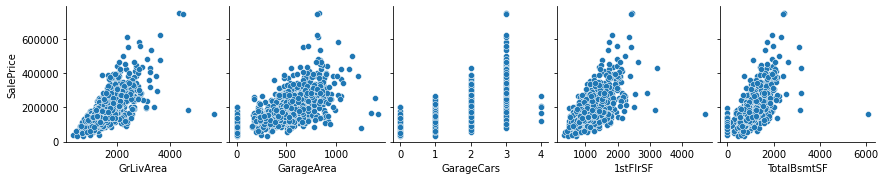

In [53]:
sns.pairplot(data = datan, x_vars = datan.drop('SalePrice', axis = 1), y_vars = 'SalePrice')

Berdasarkan plot di atas terlihat bahwa luas ruang tamu (GrLivArea), Luas garasi (GarageArea), Kapasitas garasi (Garage Area), luas daerah lantai 1 (1stFlrSF), dan total luas basement (TotalBsmntSF) memiliki pengaruh positif terhadap penjualan rumah. Artinya, peningkatan nilai seluruh variabel ini akan meningkatkan harga rumah

## Kategorik

In [55]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   OverallQual  1460 non-null   object
 2   Street       1460 non-null   object
 3   ExterQual    1460 non-null   object
dtypes: object(4)
memory usage: 45.8+ KB


In [56]:
data['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [57]:
data['OverallQual'].replace({1: 'Po',2 : 'Po', 3 : 'Fa', 4 : 'Fa', 5 :'TA',6 : 'TA',
                                 7 : 'Gd' , 8 : 'Gd', 9 : 'Ex', 10 : 'Ex'}, inplace = True)

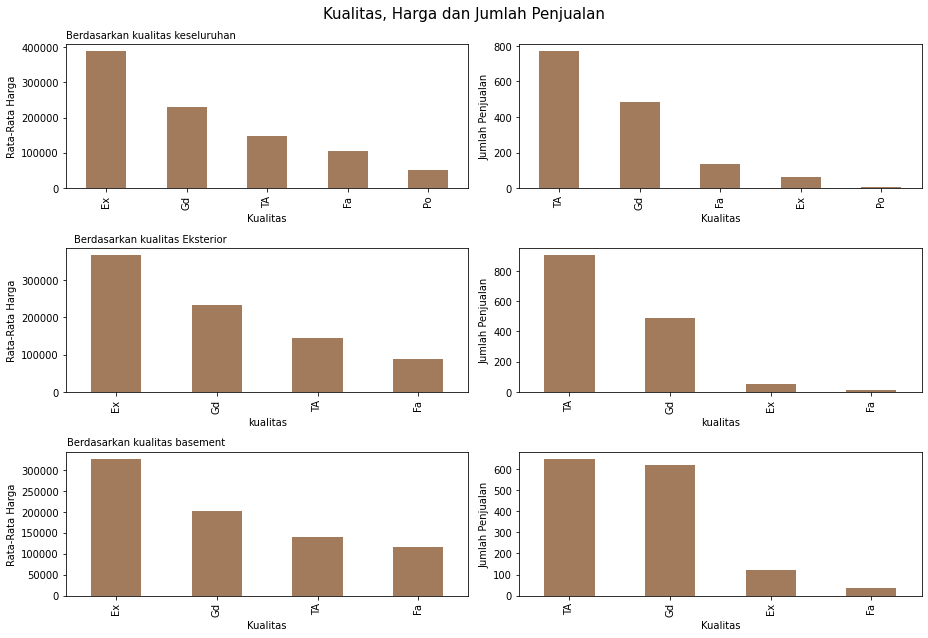

In [58]:
fig, axes = plt.subplots(3,2, figsize = (13,9))
plt.suptitle('Kualitas, Harga dan Jumlah Penjualan',  fontsize = 15)
data.groupby(['OverallQual'])['SalePrice'].mean().sort_values(ascending=False).plot(kind = 'bar', color = '#A27B5C', 
                                                   xlabel = 'Kualitas', ylabel = 'Rata-Rata Harga', ax = axes[0, 0])
data.groupby(['OverallQual'])['Id'].count().sort_values(ascending=False).plot(kind = 'bar', color = '#A27B5C', 
                                                   xlabel = 'Kualitas', ylabel = 'Jumlah Penjualan', ax = axes[0,1])
axes[0,0].set_title('Berdasarkan kualitas keseluruhan',  x = 0.21,  fontsize = 10)
#exter
data.groupby(['ExterQual'])['SalePrice'].mean().sort_values(ascending=False).plot(kind = 'bar', color = '#A27B5C', 
                                                   xlabel = 'kualitas', ylabel = 'Rata-Rata Harga', ax = axes[1,0])
data.groupby(['ExterQual'])['Id'].count().sort_values(ascending=False).plot(kind = 'bar', color = '#A27B5C', 
                                              xlabel = 'kualitas', ylabel = 'Jumlah Penjualan', ax = axes[1,1])
axes[1,0].set_title('Berdasarkan kualitas Eksterior',  x = 0.21,  fontsize = 10)     
#bsmt
data.groupby(['BsmtQual'])['SalePrice'].mean().sort_values(ascending=False).plot(kind = 'bar', color = '#A27B5C', 
                                                   xlabel = 'Kualitas', ylabel = 'Rata-Rata Harga', ax = axes[2,0])
data.groupby(['BsmtQual'])['Id'].count().sort_values(ascending=False).plot(kind = 'bar', color = '#A27B5C', 
                                                   xlabel = 'Kualitas', ylabel = 'Jumlah Penjualan', ax = axes[2,1])
axes[2,0].set_title('Berdasarkan kualitas basement',  x = 0.20,  fontsize = 10)
plt.tight_layout() 
plt.savefig('kualitas.png', bbox_inches = 'tight')

Berdasarkan plot diatas terlihat bahwa ternyata kualitas tidak menjadi pertimbangan utama dalam pembelian rumah. Hal ini dapat dilihat dari kuantitas rumah terjual paling banyak justru rumah dengan kualitas TA atau standar. Karena jika dilihat dari rata-rata harga rumah denga kualitas seperti ini cenderung lebih terjangkau dan kualitasnya pun tidak terlalu buruk atau masih di atas rumah dengan kualitas buruk.

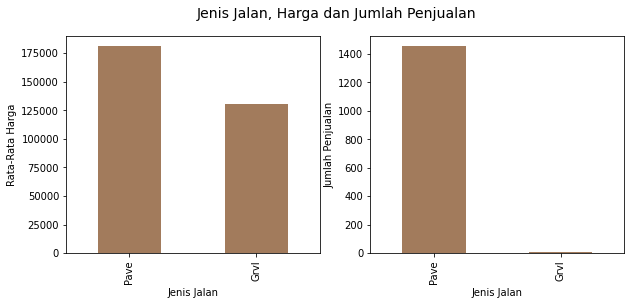

In [59]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
plt.suptitle('Jenis Jalan, Harga dan Jumlah Penjualan', fontsize = 14)
data.groupby(['Street'])['SalePrice'].mean().sort_values(ascending=False).plot(kind = 'bar', color = '#A27B5C', 
                                                   xlabel = 'Jenis Jalan', ylabel = 'Rata-Rata Harga', ax = axes[0])
data.groupby(['Street'])['Id'].count().sort_values(ascending=False).plot(kind = 'bar', color = '#A27B5C', 
                                                   xlabel = 'Jenis Jalan', ylabel = 'Jumlah Penjualan', ax = axes[1])
plt.savefig('Street.jpg', bbox_inches = 'tight')

Jika dilihat dari jenis akses jalan, terlihat bahwa kemudahan akses jalan menjadi pertimbangan utama dalam pembelian rumah. Hal ini terlihat dari banyaknya rumah dengan jenis akses jalan beraspal terjual dibanding dengan rumah dengan akses jalan berkerikil meskipun harga rumah dengan akses jalan beraspal lebih mahal.

# Modeling

## One Hot Encode

In [60]:
X = pd.get_dummies(data = prediktor1, columns = cat.columns, drop_first = True)
X1 = pd.get_dummies(data = prediktor2, columns = cat.columns, drop_first = True)
X2 = pd.get_dummies(data = prediktor3, columns = cat.columns, drop_first = True)

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   GrLivArea       1460 non-null   int64
 1   GarageArea      1460 non-null   int64
 2   GarageCars      1460 non-null   int64
 3   1stFlrSF        1460 non-null   int64
 4   TotalBsmtSF     1460 non-null   int64
 5   BsmtQual_Fa     1460 non-null   uint8
 6   BsmtQual_Gd     1460 non-null   uint8
 7   BsmtQual_TA     1460 non-null   uint8
 8   OverallQual_Fa  1460 non-null   uint8
 9   OverallQual_Gd  1460 non-null   uint8
 10  OverallQual_Po  1460 non-null   uint8
 11  OverallQual_TA  1460 non-null   uint8
 12  Street_Pave     1460 non-null   uint8
 13  ExterQual_Fa    1460 non-null   uint8
 14  ExterQual_Gd    1460 non-null   uint8
 15  ExterQual_TA    1460 non-null   uint8
dtypes: int64(5), uint8(11)
memory usage: 72.8 KB


## train test split

Pada tahap ini dilakukan pembagian data train dan data test untuk setiap penanganan missing value. sehingga terbentu 3 train test split, dalam kasus ini digunaka perbandingan train dan test secara berturut turut 70 : 30 persen.

In [62]:
from sklearn.model_selection import train_test_split
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3,
                                                    random_state=1)
y1 = X2['SalePrice']
X2 = X2.drop('SalePrice', axis = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y1, test_size=0.3,
                                                   random_state=1)

In [63]:
# Model regresi linier modus
mode_model = LinearRegression()
mode_model.fit(X_train, y_train)

# Model regresi linier dengan nilai tertentu
NA_model = LinearRegression()
NA_model.fit(X_train1, y_train1)

# Model regresi linier dengan penghapusasn
dr_model = LinearRegression()
dr_model.fit(X_train2, y_train2)

LinearRegression()

## penduga parameter modus

In [64]:
mode_koef = pd.Series(mode_model.coef_,index = X.columns)
print(mode_koef)
print(mode_model.intercept_)

GrLivArea            42.373144
GarageArea           -0.800643
GarageCars        18839.754565
1stFlrSF             10.587638
TotalBsmtSF          14.067287
BsmtQual_Fa      -59480.752899
BsmtQual_Gd      -29152.410936
BsmtQual_TA      -41349.435131
OverallQual_Fa   -87992.686241
OverallQual_Gd   -49307.958459
OverallQual_Po   -75827.727608
OverallQual_TA   -74210.357311
Street_Pave        3111.118693
ExterQual_Fa     -73054.729695
ExterQual_Gd     -33352.901771
ExterQual_TA     -48519.200475
dtype: float64
192698.99278366118


## Penduga Parameter NA

In [65]:
NA_koef = pd.Series(NA_model.coef_,index = X1.columns)
print('intercep', NA_model.intercept_)
print(NA_koef)

intercep 191689.2336771188
GrLivArea            41.507839
GarageArea            0.700012
GarageCars        18708.162381
1stFlrSF             18.789349
TotalBsmtSF           4.939564
BsmtQual_Fa      -61532.002793
BsmtQual_Gd      -29560.782716
BsmtQual_NA      -64471.632660
BsmtQual_TA      -41659.829563
OverallQual_Fa   -86833.934387
OverallQual_Gd   -50002.759412
OverallQual_Po   -70693.307413
OverallQual_TA   -74892.002649
Street_Pave        7735.191339
ExterQual_Fa     -68838.994855
ExterQual_Gd     -34210.610417
ExterQual_TA     -50054.046204
dtype: float64


## Penduga Parameter Drop NAN

In [66]:
dr_koef = pd.Series(dr_model.coef_,index = X2.columns)
print('intersep', dr_model.intercept_)
print(dr_koef)

intersep 194538.88660069002
GrLivArea             44.892810
GarageArea            -4.157844
GarageCars         19819.132470
1stFlrSF              17.291004
TotalBsmtSF            5.361653
BsmtQual_Fa       -66688.812599
BsmtQual_Gd       -37089.643872
BsmtQual_TA       -48233.461788
OverallQual_Fa   -107999.409011
OverallQual_Gd    -70416.161426
OverallQual_Po    -96839.741182
OverallQual_TA    -95169.861937
Street_Pave         4006.889140
ExterQual_Fa      -46916.151495
ExterQual_Gd      -10036.696918
ExterQual_TA      -25756.462247
dtype: float64


# Prediksi

In [67]:
y_pred = mode_model.predict(X_test)
y_pred1 = NA_model.predict(X_test1)
y_pred2 = dr_model.predict(X_test2)

## Aktual prediksi modus

In [68]:
mo = pd.DataFrame((y_test.values, y_pred), index = ['Aktual', 'Prediksi']).T
mo

,Aktual,Prediksi
0,231500.0,220900.152682
1,179500.0,164527.291060
2,122000.0,110418.743551
3,84500.0,72373.497015
4,142000.0,148614.831590
...,...,...
433,225000.0,221570.835121
434,209500.0,225335.964686
435,171900.0,189551.704994
436,173000.0,175679.344232


## Aktual prediksi NA

In [69]:
tr_pred1 = NA_model.predict(X_train1)

In [70]:
pd.DataFrame((y_test1.values, y_pred1), index = ['Aktual', 'Prediksi']).T

,Aktual,Prediksi
0,231500.0,220694.394767
1,179500.0,166002.775921
2,122000.0,110346.877148
3,84500.0,74074.815487
4,142000.0,148107.839404
...,...,...
433,225000.0,220992.584187
434,209500.0,224883.417716
435,171900.0,190219.474248
436,173000.0,174779.950458


## Aktual prediksi drop

In [71]:
ap = pd.DataFrame((y_test2.values, y_pred2), index = ['Aktual', 'Prediksi']).T
ap

,Aktual,Prediksi
0,222000.0,265544.789756
1,109000.0,119577.851258
2,122500.0,182381.445822
3,244400.0,206788.625894
4,175000.0,173040.120792
...,...,...
422,154000.0,155276.022182
423,240000.0,200847.038947
424,171000.0,123114.489833
425,91500.0,99288.018124


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


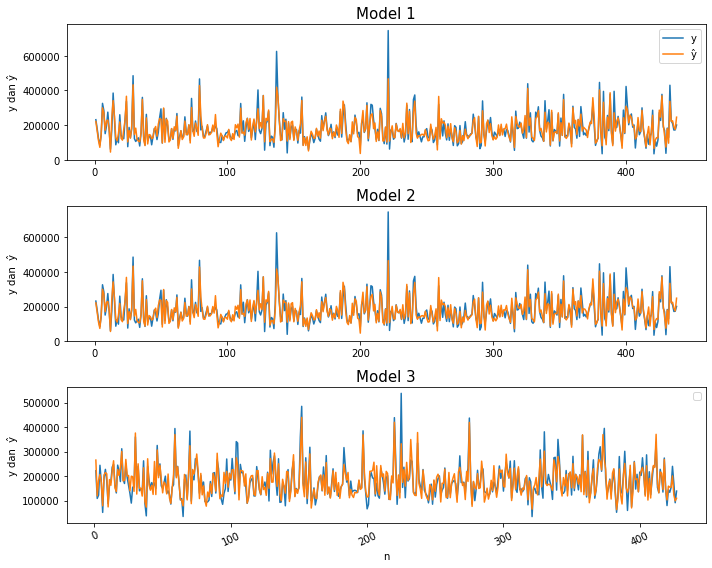

In [72]:
fig, axes = plt.subplots(3,1, figsize = (10,8))
x = range(1, len(y_test) + 1)
# Modus
sns.lineplot(x = x, y = y_test, label = 'y', ax = axes[0])
sns.lineplot(x = x, y = y_pred, label = 'y\u0302', ax = axes[0])
axes[0].set_ylabel('y dan y\u0302')
#axes[0].set_xlabel('Amatan')
axes[0].set_title('Model 1', fontsize = 15)

# NA
sns.lineplot(x = x, y = y_test1, ax = axes[1])
sns.lineplot(x = x, y = y_pred1, ax = axes[1])
axes[1].set_ylabel('y dan  y\u0302')
#axes[1].set_xlabel('Amatan')
axes[1].set_title('Model 2', fontsize = 15)

# Drop 
x1 = range(1, len(y_test2) + 1)
sns.lineplot(x = x1, y = y_test2, ax = axes[2])
sns.lineplot(x = x1, y = y_pred2, ax = axes[2])
axes[2].set_ylabel('y dan  y\u0302')
axes[2].set_xlabel('n')
axes[2].set_title('Model 3', fontsize = 15)
plt.legend()
plt.xticks(rotation = 25)
plt.tight_layout() 
plt.savefig('Aktual Prediksi.png')
plt.show()

Berdasarkan gambar diatas terlihat bahwa hasil prediksi dan nilai aktual tidak berbeda jauh, artinya model cukup baik untuk melakukan prediksi harga perumahan

# Evaluasi model

Tahap ini dilakukan untuk mengevaluasi model yang telah terbentuk.
Evaluasi model dalam kasus ini dilakukan dengan metrics R square adjusted, metrics ini lebih baik digunakan dibanding R square karena nilai R square akan terus meningkat seiring dengan peningkatan jumlah prediktor dalam model. Sehingga dalam R square adjusted pengaruh drajat bebas dalam model dapat disesuaikan.

In [88]:
print('R2 adj model 1 :', 1 - (1-mode_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))  
print('R2 adj model 2 :', 1 - (1-NA_model.score(X_train1, y_train1))*(len(y_train1)-1)/(len(y_train1)-X_train1.shape[1]-1))
print('R2 adj model 3 :', 1 - (1-dr_model.score(X_train2, y_train2))*(len(y_train2)-1)/(len(y_train2)-X_train2.shape[1]-1))

R2 adj model 1 : 0.7619050006975854
R2 adj model 2 : 0.7629401932684785
R2 adj model 3 : 0.7800297340899385


Berdasarkan hasil evaluasi model terlihat bahwa nilai R2 adjusted tidak berbeda jauh antar model, hal ini disebabkan oleh nilai hilang yang hanya sekitar 2% dari model sehingga penanganan tidak memberikan pengaruh yang terlalu signifikan untuk model. Selanjutnya, berdasarkan nilai R2 adjusted model terbaik adalah model 3, yaitu model dengan missing value dihapus. Sehingga, karena missing value yang hanya 2% atau tergolong sedikit dan hasil R2 adjusted yang menunjukkan hasil terbaik. Maka model yang dipilih adalah model 3.

## Visual

Bagian ini dibuat untuk menunjukkan perbandingan hasil prediksi antar model, untuk menggambarkan kemiripan nilai R square adjusted

In [76]:
visual = pd.concat((num,cat, data[['SalePrice', 'Id']]), axis = 1)

In [77]:
visual['OverallQual'].replace({1: 'Po',2 : 'Po', 3 : 'Fa', 4 : 'Fa', 5 :'TA',6 : 'TA',
                                 7 : 'Gd' , 8 : 'Gd', 9 : 'Ex', 10 : 'Ex'}, inplace = True)

In [78]:
vis1 = visual.copy()
vis1['BsmtQual']= vis1['BsmtQual'].fillna(vis1['BsmtQual'].mode()[0])
vis2 = visual.copy()
vis2['BsmtQual']= vis2['BsmtQual'].fillna('NA')
vis3 = visual.copy()
vis3.dropna(inplace = True)

In [79]:
Xv = pd.get_dummies(data = vis1, columns = cat.columns, drop_first = True)
X1v = pd.get_dummies(data = vis2, columns = cat.columns, drop_first = True)
X2v = pd.get_dummies(data = vis3, columns = cat.columns, drop_first = True)

In [80]:
from sklearn.model_selection import train_test_split
yv = vis1['SalePrice']
Xv.drop('SalePrice', axis = 1, inplace = True)
X1v.drop('SalePrice', axis = 1, inplace = True)
X_trainv, X_testv, y_trainv, y_testv = train_test_split(Xv, yv, test_size=0.3,
                                                    random_state=1)
X_train1v, X_test1v, y_train1v, y_test1v = train_test_split(X1v, yv, test_size=0.3,
                                                    random_state=1)
y1v = X2v['SalePrice']
X2v = X2v.drop('SalePrice', axis = 1)
X_train2v, X_test2v, y_train2v, y_test2v = train_test_split(X2v, y1v, test_size=0.3,
                                                   random_state=1)

In [81]:
y_predv = mode_model.predict(X_testv.drop('Id', axis = 1))
y_pred1v = NA_model.predict(X_test1v.drop('Id', axis = 1))
y_pred2v = dr_model.predict(X_test2v.drop('Id', axis = 1))

In [82]:
df = pd.DataFrame({'Id1':X_testv['Id'],
                  'yt' :y_testv,
                 #'Id2' :X_test2v['Id'],
                 'yt1':y_test1v,
                 'yp' :y_predv,
                 'yp1' :y_pred1v})

In [83]:
df1 = pd.DataFrame({'Id2' : X_test2v['Id'],
                   'yt2' : y_test2v,
                   'yp2' : y_pred2v})
df1

,Id2,yt2,yp2
412,413,222000,265544.789756
38,39,109000,119577.851258
1416,1417,122500,182381.445822
939,940,244400,206788.625894
429,430,175000,173040.120792
...,...,...,...
1071,1072,154000,155276.022182
848,849,240000,200847.038947
1170,1171,171000,123114.489833
1219,1220,91500,99288.018124


In [84]:
pd.concat((X_trainv['Id'], X_train1v['Id'], X_train2v['Id']), axis = 1)

,Id,Id,Id
632,633.0,633.0,633.0
208,209.0,209.0,NaN
83,84.0,84.0,NaN
1174,1175.0,1175.0,NaN
250,251.0,251.0,251.0
...,...,...,...
1237,NaN,NaN,1238.0
133,NaN,NaN,134.0
148,NaN,NaN,149.0
983,NaN,NaN,984.0


In [85]:
df = df.merge(df1, left_on ='Id1', right_on = 'Id2', how = 'inner')
df

,Id1,yt,yt1,yp,yp1,Id2,yt2,yp2
0,54,385000,385000,341726.400654,342130.210145,54,385000,368668.113812
1,92,98600,98600,151805.983616,151138.266113,92,98600,150447.141304
2,681,143000,143000,124423.434790,124024.081248,681,143000,121595.735387
3,465,124000,124000,113637.334052,112763.815555,465,124000,110777.093462
4,1417,122500,122500,176336.916005,180987.467645,1417,122500,182381.445822
...,...,...,...,...,...,...,...,...
122,243,79000,79000,128315.118417,130915.497152,243,79000,130654.203075
123,1331,227000,227000,246296.146227,245948.232140,1331,227000,244292.651130
124,969,37900,37900,73758.947583,75293.550722,969,37900,73604.277172
125,632,209500,209500,225335.964686,224883.417716,632,209500,223000.225950


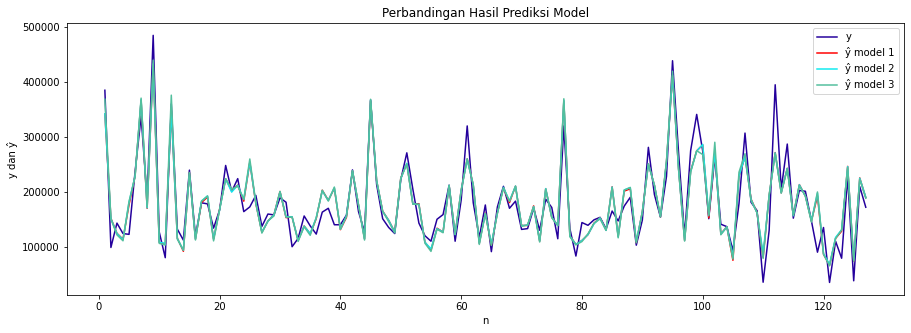

In [86]:
fig = plt.subplots(figsize = (15,5))
x = range(1, len(df['Id1']) + 1)
# Modus
sns.lineplot(data = df, x = x, y = 'yt', color = '#24009C', label = 'y')
sns.lineplot(data = df, x = x, y = 'yp', color = '#FF0000', label = 'y\u0302 model 1')
sns.lineplot(data = df, x = x, y = 'yp1', color = '#10EAF0', label = 'y\u0302 model 2')
sns.lineplot(data = df, x = x, y = 'yp2', color ='#53BF9D', label = 'y\u0302 model 3')
plt.ylabel('y dan y\u0302')
plt.xlabel('n')
plt.title('Perbandingan Hasil Prediksi Model')
plt.legend()
plt.savefig('Perbandingan hasil prediksi.png')
plt.show()

Pada grafik diatas terlihat bahwa nilai prediksi untuk ketiga model hampir sama terlihat dari seluruh garis pada grafik yang saling bertumpuk. Hal ini juga sesuai dengan nilai R square adjusted yang menunjukkan hasil yang tidak jauh berbeda antar model.